This python script compares dimensionality reduction using PCA with dimensionality reduction using an Autoencoder. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
seed = 7
np.random.seed(seed)

## Load the data

In [3]:
df=pd.read_csv('data_with_300_features.csv')

## Explore the data

In [4]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,f_300,y
0,0.0,0.116994,0.177675,0.252444,0.355121,0.495311,0.684092,-0.839354,-1.326296,-1.671100,...,-1.405770,-1.393238,0.677601,0.536906,0.414476,0.364132,0.319452,0.235923,0.260693,1
1,0.0,0.116994,0.177675,0.252444,0.355121,0.430807,-1.591455,0.296621,0.840551,0.676209,...,-0.447146,0.794763,0.677601,0.536906,0.414476,0.364132,0.319452,0.235923,0.260693,1
2,0.0,0.116994,0.177675,0.252444,-0.560008,-2.246099,0.684092,-0.254155,0.840551,0.676209,...,0.799064,0.794763,-1.542158,0.536906,0.414476,0.364132,0.319452,0.235923,0.260693,1
3,0.0,0.116994,0.177675,0.252444,0.355121,0.495311,-1.591455,0.847396,0.840551,0.676209,...,-1.405770,-1.393238,-1.533314,0.536906,0.414476,0.364132,0.319452,0.235923,0.260693,1
4,0.0,0.116994,0.177675,0.252444,-0.503692,-2.246099,-1.591455,-0.908201,0.840551,0.676209,...,0.799064,-1.350336,-1.577532,0.363711,0.414476,0.364132,0.319452,0.235923,0.260693,1


In [5]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,f_300,y
count,550.0,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,...,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,550.000000
mean,0.0,2.493673e-07,2.712727e-09,-1.834545e-08,-4.503636e-08,-4.261818e-08,4.004000e-08,-1.443818e-08,1.253818e-08,4.839091e-08,...,-5.096673e-08,8.558182e-09,-2.467091e-08,-3.193055e-08,-7.976364e-08,-1.965818e-09,5.548182e-08,1.311818e-07,1.012727e-07,5.500000
std,0.0,1.000912e+00,1.000908e+00,1.000908e+00,1.000909e+00,1.000910e+00,1.000907e+00,1.000909e+00,1.000909e+00,1.000910e+00,...,1.000911e+00,1.000910e+00,1.000913e+00,1.000910e+00,1.000914e+00,1.000912e+00,1.000911e+00,1.000908e+00,1.000907e+00,2.874896
min,0.0,-1.028785e+01,-6.137300e+00,-4.387830e+00,-3.235000e+00,-2.246099e+00,-1.591455e+00,-1.347100e+00,-1.326296e+00,-1.671100e+00,...,-1.423199e+00,-1.393238e+00,-1.577532e+00,-2.061027e+00,-2.663154e+00,-2.949277e+00,-3.346923e+00,-4.414564e+00,-3.835909e+00,1.000000
25%,0.0,1.169944e-01,1.776748e-01,2.524441e-01,3.551211e-01,4.738094e-01,-1.522297e+00,-1.347100e+00,-1.326296e+00,-1.010632e+00,...,-1.405770e+00,-1.393238e+00,-1.533314e+00,3.178647e-01,4.144760e-01,3.641325e-01,3.194517e-01,2.359232e-01,2.606930e-01,3.000000
50%,0.0,1.169944e-01,1.776748e-01,2.524441e-01,3.551211e-01,4.953107e-01,6.840920e-01,8.473964e-01,8.320537e-01,6.762092e-01,...,7.990640e-01,7.947632e-01,6.776013e-01,5.369061e-01,4.144760e-01,3.641325e-01,3.194517e-01,2.359232e-01,2.606930e-01,5.500000
75%,0.0,1.169944e-01,1.776748e-01,2.524441e-01,3.551211e-01,4.953107e-01,6.840920e-01,8.473964e-01,8.405511e-01,6.762092e-01,...,7.990640e-01,7.947632e-01,6.776013e-01,5.369061e-01,4.144760e-01,3.641325e-01,3.194517e-01,2.359232e-01,2.606930e-01,8.000000
max,0.0,1.169944e-01,1.776748e-01,2.524441e-01,3.551211e-01,4.953107e-01,6.840920e-01,8.473964e-01,8.405511e-01,6.762092e-01,...,7.990640e-01,7.947632e-01,6.776013e-01,5.369061e-01,4.144760e-01,3.641325e-01,3.194517e-01,2.359232e-01,2.606930e-01,10.000000


In [6]:
df.shape

(550, 301)

In [7]:
x = df.iloc[:,0:300]

In [8]:
x.shape

(550, 300)

In [9]:
y = df['y']

In [10]:
y.shape

(550,)

In [11]:
y.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Splitting into train and validation sets

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size=0.33, 
                                                  stratify=y)

## Scale the features

In [13]:
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train)

In [15]:
x_val = scaler.transform(x_val)

## Dimensionality reduction with PCA

In [16]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_val)
pca.explained_variance_ratio_

array([0.10474607, 0.08875202])

In [17]:
x_pca.shape

(182, 2)

## Plot the first two principal components

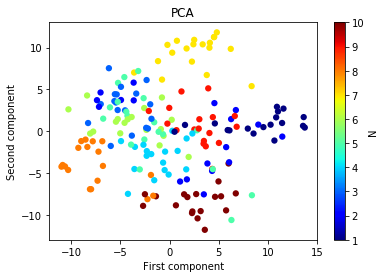

In [18]:
plt.scatter(x_pca[:,0], x_pca[:,1], cmap="jet", c=y_val, marker="o", edgecolor="none", s=40*np.ones(550), vmin=1, vmax=10)
cbar = plt.colorbar()
cbar.set_label("N")
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA')
plt.show()

## Dimensionality reduction with autoencoder

In [19]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(300,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='linear', name="bottleneck"))
model.add(Dense(20, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(300, activation='linear'))

In [20]:
model.compile(loss='mse', optimizer='adam')

In [21]:
callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=4),
             ModelCheckpoint(filepath='best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True)]

In [22]:
history = model.fit(x_train, x_train, 
                    batch_size=1, epochs=50,
                    callbacks=callbacks,
                    validation_data=(x_val,x_val))

Train on 368 samples, validate on 182 samples
Epoch 1/50
368/368 [==============================] - 2s 4ms/step - loss: 0.9457 - val_loss: 0.8685
Epoch 2/50
368/368 [==============================] - 1s 3ms/step - loss: 0.8227 - val_loss: 0.7953
Epoch 3/50
368/368 [==============================] - 1s 3ms/step - loss: 0.7639 - val_loss: 0.7609
Epoch 4/50
368/368 [==============================] - 1s 3ms/step - loss: 0.7324 - val_loss: 0.7403
Epoch 5/50
368/368 [==============================] - ETA: 0s - loss: 0.711 - 1s 3ms/step - loss: 0.7085 - val_loss: 0.7281
Epoch 6/50
368/368 [==============================] - 1s 3ms/step - loss: 0.6958 - val_loss: 0.7207
Epoch 7/50
368/368 [==============================] - 1s 3ms/step - loss: 0.6835 - val_loss: 0.7157
Epoch 8/50
368/368 [==============================] - 1s 2ms/step - loss: 0.6816 - val_loss: 0.7123
Epoch 9/50
368/368 [==============================] - 1s 3ms/step - loss: 0.6730 - val_loss: 0.7057
Epoch 10/50
368/368 [=========

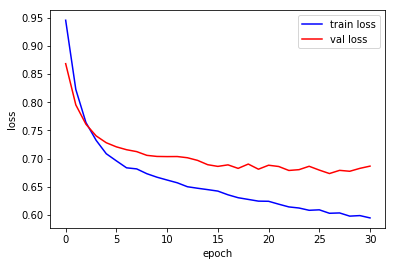

In [23]:
plt.plot(history.epoch,history.history['loss'],c='b',label='train loss')
plt.plot(history.epoch,history.history['val_loss'],c='r',label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [24]:
encoder = Model(model.input, model.get_layer('bottleneck').output)

In [25]:
x_ae = encoder.predict(x_val)

## Compare PCA and Autoencoder dimensionality reduction

In [26]:
plt.rcParams.get('figure.figsize')

[6.0, 4.0]

In [27]:
plt.figure(figsize=(12.0,4.0))

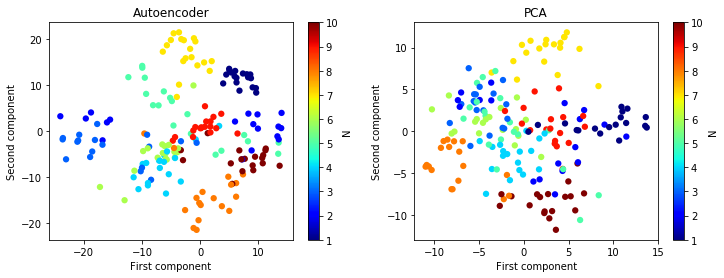

In [28]:
plt.subplot(1,2,1)
plt.scatter(x_ae[:,0], x_ae[:,1], cmap="jet", c=y_val, marker="o", edgecolor="none", s=40*np.ones(550), vmin=1, vmax=10)
cbar = plt.colorbar()
cbar.set_label("N")
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Autoencoder')

plt.subplot(1,2,2)
plt.scatter(x_pca[:,0], x_pca[:,1], cmap="jet", c=y_val, marker="o", edgecolor="none", s=40*np.ones(550), vmin=1, vmax=10)
cbar = plt.colorbar()
cbar.set_label("N")
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA')

plt.show()